In [81]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [82]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

In [83]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [84]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [85]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [86]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [87]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
61/61 [==============================] - 138s 2s/step - loss: 1.8850 - accuracy: 0.4421 - val_loss: 0.8641 - val_accuracy: 0.7222
Epoch 2/15
61/61 [==============================] - 99s 2s/step - loss: 0.8346 - accuracy: 0.6528 - val_loss: 0.5846 - val_accuracy: 0.7222
Epoch 3/15
61/61 [==============================] - 98s 2s/step - loss: 0.6416 - accuracy: 0.7552 - val_loss: 0.3899 - val_accuracy: 0.8333
Epoch 4/15
61/61 [==============================] - 101s 2s/step - loss: 0.5066 - accuracy: 0.8084 - val_loss: 0.3626 - val_accuracy: 0.8889
Epoch 5/15
61/61 [==============================] - 100s 2s/step - loss: 0.4237 - accuracy: 0.8384 - val_loss: 0.5967 - val_accuracy: 0.7778
Epoch 6/15
61/61 [==============================] - 100s 2s/step - loss: 0.4193 - accuracy: 0.8614 - val_loss: 0.1284 - val_accuracy: 1.0000
Epoch 7/15
61/61 [==============================] - 100s 2s/step - loss: 0.3039 - accuracy: 0.8953 - val_loss: 0.4949 - val_accuracy: 0.8889
Epoch 8/15
61/6

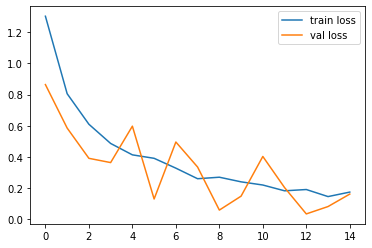

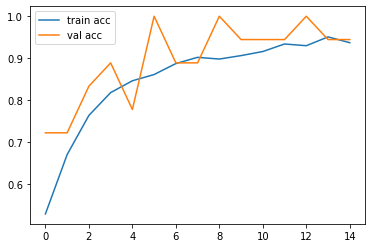

<Figure size 432x288 with 0 Axes>

In [119]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [120]:
y_pred = model.predict(test_set)

In [121]:
y_pred

array([[4.04632243e-04, 4.32956636e-01, 1.95316933e-02, 5.47107041e-01],
       [8.20021480e-02, 2.49801159e-01, 6.63563728e-01, 4.63301549e-03],
       [1.41046485e-05, 9.99029875e-01, 7.73551221e-07, 9.55344527e-04],
       [5.12867421e-03, 1.60767362e-01, 4.10188877e-05, 8.34062934e-01],
       [2.25325152e-06, 9.98989046e-01, 6.72321789e-07, 1.00800348e-03],
       [5.97747834e-03, 2.18076166e-03, 9.91576791e-01, 2.64952047e-04],
       [2.53991719e-04, 9.90830541e-01, 7.72502972e-04, 8.14300682e-03],
       [9.88046408e-01, 1.04090674e-02, 6.98368240e-07, 1.54378265e-03],
       [2.85961232e-05, 9.98782814e-01, 5.56393104e-07, 1.18806551e-03],
       [3.91890248e-03, 1.21131368e-01, 8.70750189e-01, 4.19946993e-03],
       [4.78083559e-04, 2.59138376e-01, 8.39994382e-03, 7.31983602e-01],
       [1.07219315e-03, 9.97090578e-01, 4.88432488e-05, 1.78834982e-03],
       [9.87000823e-01, 1.29895788e-02, 8.77559887e-06, 7.13904683e-07],
       [8.46358598e-04, 1.74638093e-01, 8.24509561e

In [122]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [123]:
y_pred

array([3, 2, 1, 3, 1, 2, 1, 0, 1, 2, 3, 1, 0, 2, 1, 3, 2, 0], dtype=int64)

In [125]:
import numpy as np
from keras.preprocessing import image
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

[[0. 0. 1. 0.]]


Text(0.5, 0, "Actual: 'fresh cotton leaf'\nPredicted: fresh cotton leaf")

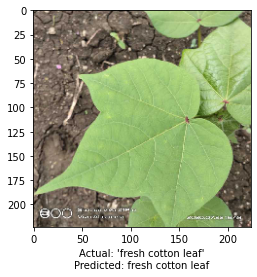

In [141]:
test_image = image.load_img('Datasets/val/fresh cotton leaf/d (11)_iaip.jpg', target_size = (224, 224))
test_img = image.img_to_array(test_image)
test_img = np.expand_dims(test_image, axis = 0)
result = model.predict(test_img)
print(result)
if result[0][0] == 1.0:
    prediction = 'diseased cotton leaf'
elif result[0][1] == 1.0:
    prediction = 'diseased cotton plant'
elif result[0][2] == 1.0:
    prediction = 'fresh cotton leaf'
else:
    prediction = 'fresh cotton plant'
plt.imshow(test_image)
plt.xlabel("Actual: 'fresh cotton leaf'\nPredicted: {}".format(prediction))

[[1. 0. 0. 0.]]


Text(0.5, 0, "Actual: 'fresh cotton plant'\nPredicted: diseased cotton leaf")

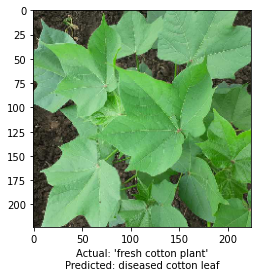

In [150]:
test_image = image.load_img('Datasets/val/fresh cotton plant/dsd (246)_iaip.jpg', target_size = (224, 224))
test_img = image.img_to_array(test_image)
test_img = np.expand_dims(test_image, axis = 0)
result = model.predict(test_img)
print(result)
if result[0][0] == 1.0:
    prediction = 'diseased cotton leaf'
elif result[0][1] == 1.0:
    prediction = 'diseased cotton plant'
elif result[0][2] == 1.0:
    prediction = 'fresh cotton leaf'
else:
    prediction = 'fresh cotton plant'
plt.imshow(test_image)
plt.xlabel("Actual: 'fresh cotton plant'\nPredicted: {}".format(prediction))

[[1. 0. 0. 0.]]


Text(0.5, 0, "Actual: 'diseased cotton leaf'\nPredicted: diseased cotton leaf")

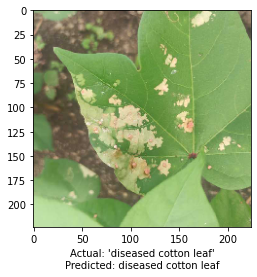

In [138]:
test_image = image.load_img('Datasets/val/diseased cotton leaf/dis_leaf (37)_iaip.jpg', target_size = (224, 224))
test_img = image.img_to_array(test_image)
test_img = np.expand_dims(test_image, axis = 0)
result = model.predict(test_img)
print(result)
if result[0][0] == 1.0:
    prediction = 'diseased cotton leaf'
elif result[0][1] == 1.0:
    prediction = 'diseased cotton plant'
elif result[0][2] == 1.0:
    prediction = 'fresh cotton leaf'
else:
    prediction = 'fresh cotton plant'
plt.imshow(test_image)
plt.xlabel("Actual: 'diseased cotton leaf'\nPredicted: {}".format(prediction))

[[1. 0. 0. 0.]]


Text(0.5, 0, "Actual: 'diseased cotton plant'\nPredicted: 'diseased cotton plant'")

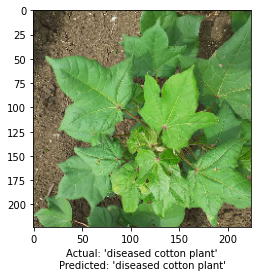

In [154]:
test_image = image.load_img('Datasets/val/diseased cotton plant/dd (78)_iaip.jpg', target_size = (224, 224))
test_img = image.img_to_array(test_image)
test_img = np.expand_dims(test_image, axis = 0)
result = model.predict(test_img)
print(result)
if result[0][0] == 1.0:
    prediction = 'diseased cotton leaf'
elif result[0][1] == 1.0:
    prediction = 'diseased cotton plant'
elif result[0][2] == 1.0:
    prediction = 'fresh cotton leaf'
else:
    prediction = 'fresh cotton plant'
plt.imshow(test_image)
plt.xlabel("Actual: 'diseased cotton plant'\nPredicted: 'diseased cotton plant'")